# Practical Lab 2 - Data Visualization and Publication

In [101]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

## Stock Prices using plotly

For my first graph I want to demonstrate how to use plotly to plot the historical prices of a stock using a candlestick chart.  I chose to do this because one of my goals for this program is to learn how to apply machine learning methods to financial markets.

For this demonstration, I will be using the historical price data of Unity, which is a software used for game development.  I chose Unity simply because I am currently teaching myself Unity.

In [102]:
eurusd = pd.read_csv("U.csv")

fig = go.Figure(data = [go.Candlestick(x = eurusd['Date'],
                open = eurusd['Open'],
                high = eurusd['High'],
                low = eurusd['Low'],
                close = eurusd['Close'])])

fig.update_layout(
    title = "Unity Stock Prices",
    yaxis_title = "Price",
    xaxis_title = "Date",
    xaxis_rangeslider_visible = False
)
fig.show()

A candlestick can be read as follows:
* The tops and bottoms of each stick represent the highest and lowest price that the stock reached during that period.  Since this is a daily time frame, each top and bottom represents the highest and lowest price the stock moved that day.
* The bodies of each candlestick are a bit more dynamic.  Each end of the bodies represents the open price or the close price of the stock during that period.  Since this is a daily time frame, the ends of the bodies represent the price that the stock started the day with or the price that the stock finished the day with.
  *  If the candlestick is green, that means that the bottom of the body is the opening price, and the top of the body is the closing price.  The candlestick being green means that the stock ended the day at a higher price than the stock started the day with.
  * If the candlestick is red, that means that the top of the bosy is the opening price, and the bottom of the body is the closing price.  The candlestick being red means that the stock ended the day at a lower price than the stock started the day with.

## Plotting Relative Strength Index with matplotlib

In [103]:
def rsi(stockData, period):

    open = stockData['Open']
    close = stockData['Close']
    returns = (close - open)/close

    intialReturns = returns[0:period]
    avgGain = sum(intialReturns[intialReturns >= 0])/period
    avgLoss = abs(sum(intialReturns[intialReturns < 0]))/period
    rsi1 = 100 - (100 / (1 + avgGain / avgLoss))
    rsIndexes = np.array([rsi1])

    for i in range(period, len(returns) - 1):
        intialReturns = returns[(i - period):i]
        avgGain = sum(intialReturns[intialReturns >= 0])/period
        avgLoss = abs(sum(intialReturns[intialReturns < 0]))/period
        rsIndexes = np.append(rsIndexes, 100 - (100 / (1 + avgGain / avgLoss)))
    
    return rsIndexes

rsiValues = rsi(eurusd, 10)


Text(0, 0.5, 'RSI')

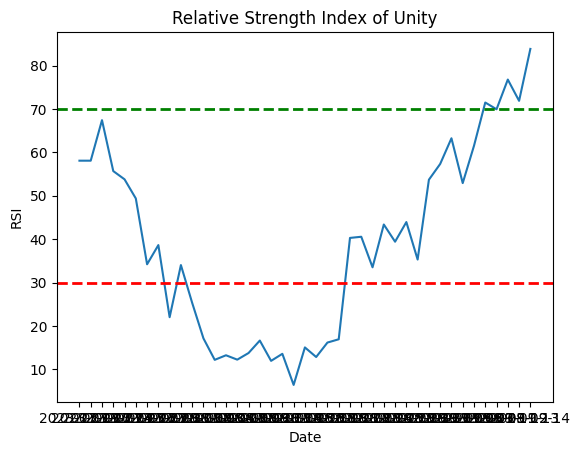

In [104]:
dates = eurusd['Date'][(len(eurusd['Date']) - len(rsiValues)):len(eurusd['Date'])]


fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(dates, rsi(eurusd, 10))
plt.axhline(y=70, color='g', linestyle='--', linewidth=2)
plt.axhline(y=30, color='r', linestyle='--', linewidth=2) 
plt.title("Relative Strength Index of Unity")
plt.xlabel('Date') 
plt.ylabel('RSI') 


A general rule-of-thumb is that when the RSI is above 70, the stock is considered overbought, and it is a signal that the stock price will start going down.  Conversely, when the RSI is below 30, the stock is considered oversold, and it is a signla that the stock price will start increasing.